In [1]:
import  sys

# os.environ['KMP_DUPLICATE_LIB_OK']='True' # uncomment this line if omp error occurs on OSX for python 3
# os.environ["OMP_NUM_THREADS"] = "4" # export OMP_NUM_THREADS=4
# os.environ["OPENBLAS_NUM_THREADS"] = "4" # export OPENBLAS_NUM_THREADS=4 
# os.environ["MKL_NUM_THREADS"] = "6" # export MKL_NUM_THREADS=6
# os.environ["VECLIB_MAXIMUM_THREADS"] = "4" # export VECLIB_MAXIMUM_THREADS=4
# os.environ["NUMEXPR_NUM_THREADS"] = "6" # export NUMEXPR_NUM_THREADS=6

# from scipy import linalg
import stomp_functions as stf
from quspin.operators import hamiltonian, commutator
from quspin.basis import spinful_fermion_basis_general
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# print("NumPy:", numpy.__version__)
# print("SciPy:", scipy.__version__)
from qiskit.quantum_info import random_clifford

1.26.4


In [2]:
# Set font size of plot elements
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
τ = 3
num_steps = 1500
τs, dτ = np.linspace(0, τ, num_steps, retstep=True)

In [4]:
# Define files for saving ovlp data
main_path = "2D_FH_clifford_testing/"
ovlps = {}
H_ovlps = {}
exact_E = {}
for i in range(1, 5):
    # Load relevant files
    # N_2d = i * 2
    N_2d =4 
    N_up = N_2d // 2 + 0
    N_down = N_2d // 2
    ovlp_file = main_path + "2DFH_ovlp_N2d=" + str(N_2d) + "_Nferm=" + str(N_up + N_down) \
            +"_Numsteps=" + str(num_steps) + "_t=" + str(τ) +".npz"
    ovlp = np.load(ovlp_file, allow_pickle=True)
    ovlps[i] = np.mean(list(ovlp.values()), axis=0)
    
    H_ovlp_file = main_path + "2DFH_H_ovlp_N2d=" + str(N_2d) + "_Nferm=" + str(N_up + N_down) \
            +"_Numsteps=" + str(num_steps) + "_t=" + str(τ) +".npz"
    H_ovlp = np.load(H_ovlp_file, allow_pickle=True)
    H_ovlps[i] = np.mean(list(H_ovlp.values()), axis=0)
    
    exact_file = main_path + "2DFH_exact_N2d=" + str(N_2d) + "_Nferm=" + str(N_up + N_down) \
            +"_Numsteps=" + str(num_steps) + "_t=" + str(τ) +".npz"
    exact = np.load(exact_file, allow_pickle=True)
    exact_E[i] = exact['E'][0:4]
    if i == 3:
        exact_E[i] = [exact['E'][0], exact['E'][1], exact['E'][3], exact['E'][5]]
    
    

In [5]:
calc_E = {}
for i in range(1, 5):
    temp = []
    for λ in exact_E[i]:
        temp.append(stf.alt_partition_calc(ovlps[i], H_ovlps[i], num_steps, λ, dτ)[1][-1] - λ)
    calc_E[i] = np.array(temp)

In [6]:
exact_E

{1: array([-8.68169523, -8.58590276, -7.72775268, -7.57052173]),
 2: array([-8.68169523, -8.58590276, -7.72775268, -7.57052173]),
 3: [-8.681695234496685,
  -8.585902761392367,
  -7.570521729659317,
  -5.123105625617657],
 4: array([-8.68169523, -8.58590276, -7.72775268, -7.57052173])}

In [7]:
calc_E

{1: array([-8.50286797+0.j, -8.40642491+0.j, -7.68051464+0.j, -7.665315  +0.j]),
 2: array([-8.50286797+0.j, -8.40642491+0.j, -7.68051464+0.j, -7.665315  +0.j]),
 3: array([-8.50286797+0.j, -8.40642491+0.j, -7.665315  +0.j, -5.07824717+0.j]),
 4: array([-8.50286797+0.j, -8.40642491+0.j, -7.68051464+0.j, -7.665315  +0.j])}

In [8]:
colors = mpl.colormaps['cividis'].resampled(4).colors
err = {}
for i in range(4):
    temp = []
    for j in range(1, 5):
        temp.append(np.abs(exact_E[j][i] - calc_E[j][i]) / np.abs(exact_E[j][i]))
    err[i] = np.array(temp)

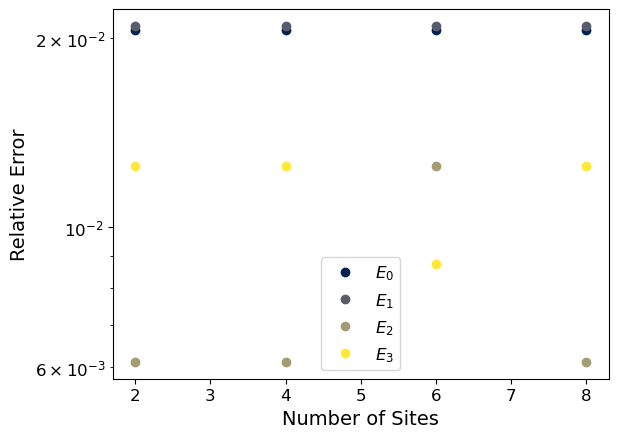

In [9]:
for i in range(4):
    plt.semilogy([2, 4, 6, 8], err[i], 'o', color=colors[i], label='$E_'+str(i)+'$')
plt.xlabel("Number of Sites")
plt.ylabel("Relative Error")
plt.legend()
plt.savefig("2DFH_relerr.png", format='png', dpi=300)

In [10]:
i = 2
N_2d = i * 2
N_up = N_2d // 2 + 0
N_down = N_2d // 2
ovlp_file = main_path + "2DFH_ovlp_N2d=" + str(N_2d) + "_Nferm=" + str(N_up + N_down) \
            +"_Numsteps=" + str(num_steps) + "_t=" + str(τ) +".npz"
ovlp = np.load(ovlp_file, allow_pickle=True)
ovlps = np.mean(list(ovlp.values()), axis=0)
    
H_ovlp_file = main_path + "2DFH_H_ovlp_N2d=" + str(N_2d) + "_Nferm=" + str(N_up + N_down) \
            +"_Numsteps=" + str(num_steps) + "_t=" + str(τ) +".npz"
H_ovlp = np.load(H_ovlp_file, allow_pickle=True)
H_ovlps = np.mean(list(H_ovlp.values()), axis=0)
    
exact_file = main_path + "2DFH_exact_N2d=" + str(N_2d) + "_Nferm=" + str(N_up + N_down) \
            +"_Numsteps=" + str(num_steps) + "_t=" + str(τ) +".npz"
exact = np.load(exact_file, allow_pickle=True)
exact_E = exact['E']

In [11]:
exact_E.size

36

In [12]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

class TOLcmaps(object):
    """
    Class TOLcmaps definition.  Used for generating color map for plots
    """
    def __init__(self):
        """
        """
        self.cmap = None
        self.cname = None
        self.namelist = (
            'rainbow_PuRd',)

        self.funcdict = dict(
            zip(self.namelist,
                (self.__rainbow_PuRd,
                )
               )
        )
        
    def __rainbow_PuRd(self):
        """
        Define colormap 'rainbow_PuRd'.
        """
        clrs = ['#6F4C9B', '#6059A9', '#5568B8', '#4E79C5', '#4D8AC6',
                '#4E96BC', '#549EB3', '#59A5A9', '#60AB9E', '#69B190',
                '#77B77D', '#8CBC68', '#A6BE54', '#BEBC48', '#D1B541',
                '#DDAA3C', '#E49C39', '#E78C35', '#E67932', '#E4632D',
                '#DF4828', '#DA2222']
        self.cmap = LinearSegmentedColormap.from_list(self.cname, clrs)
        self.cmap.set_bad('#FFFFFF')
        
    def get(self, cname='rainbow_PuRd', lut=None):
        """
        Return requested colormap, default is 'rainbow_PuRd'.
        """
        self.cname = cname
        if cname == 'rainbow_discrete':
            self.__rainbow_discrete(lut)
        else:
            self.funcdict[cname]()
        return self.cmap
def tol_cmap(colormap=None, lut=None):
    """
    Continuous and discrete color sets for ordered data.
    
    Return a matplotlib colormap.
    Parameter lut is ignored for all colormaps except 'rainbow_discrete'.
    """
    obj = TOLcmaps()
    if colormap is None:
        return obj.namelist
    if colormap not in obj.namelist:
        colormap = 'rainbow_PuRd'
        print('*** Warning: requested colormap not defined,',
              'known colormaps are {}.'.format(obj.namelist),
              'Using {}.'.format(colormap))
    return obj.get(colormap, lut)

E:\Anaconda\envs\quantum_env_2\lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
E:\Anaconda\envs\quantum_env_2\lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


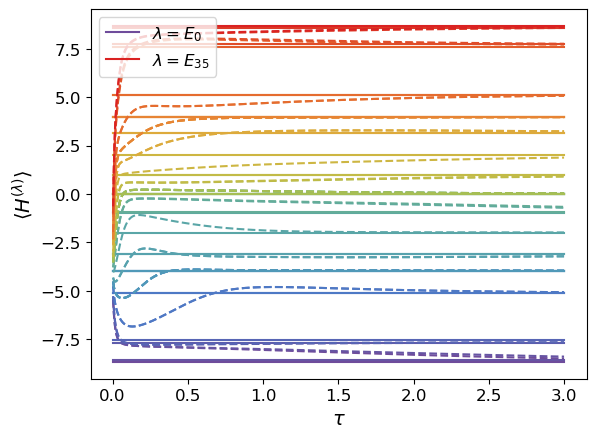

In [13]:
colors = tol_cmap('rainbow_PuRd').resampled(len(list(exact_E)))
for i, λ in enumerate(exact_E):
    if i == 0 or i == exact_E.size-1:
        plt.plot(τs[2::2], λ * np.ones(τs[2::2].size), color=colors(i), label='$\\lambda=E_{'+str(i)+'}$')
    else:
        plt.plot(τs[2::2], λ * np.ones(τs[2::2].size), color=colors(i))
        
    plt.plot(τs[2::2], stf.alt_partition_calc(ovlps, H_ovlps, num_steps,
                                             λ, dτ)[1][1:] - λ, '--', color=colors(i))
plt.xlabel("$\\tau$")
plt.ylabel("$\\langle H^{(\\lambda)}_{\\rm FH} \\rangle$")
plt.legend()
plt.savefig("2DFH_4site_conv.png", format='png', dpi=300)

In [14]:
λs = np.linspace(-1.1 * abs(exact_E[0]), 1.1 * abs(exact_E[0]), 100)
calculated_energies = [stf.alt_partition_calc(ovlps, H_ovlps, num_steps, _, dτ)[1][-1]
                      for _ in λs]

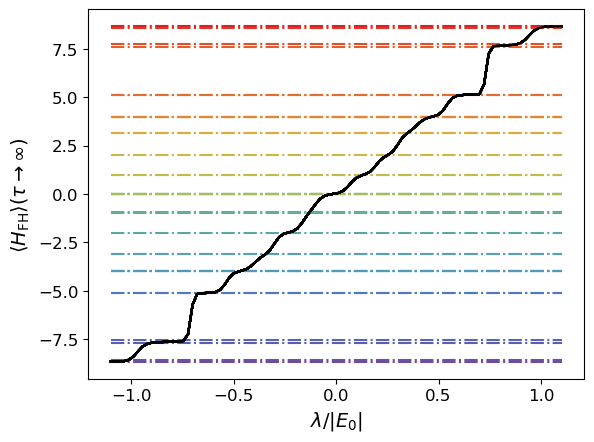

In [15]:
colors = tol_cmap('rainbow_PuRd').resampled(len(list(exact_E)))
for i, e in enumerate(exact_E):
    plt.plot(λs / abs(exact_E[0]), e * np.ones(λs.shape[0]),
            '-.', color=colors(i))
    plt.plot(λs / abs(exact_E[0]), calculated_energies-λs, 'k')
    
plt.ylabel("$\\langle H_{\\rm FH} \\rangle(\\tau \\rightarrow \\infty)$")
plt.xlabel("$\\lambda/|E_0|$")
plt.savefig("2DFH_4site_sweep.png", format='png', dpi=300)

In [16]:
from scipy.special import binom
binom(100, 50)

1.0089134454556415e+29

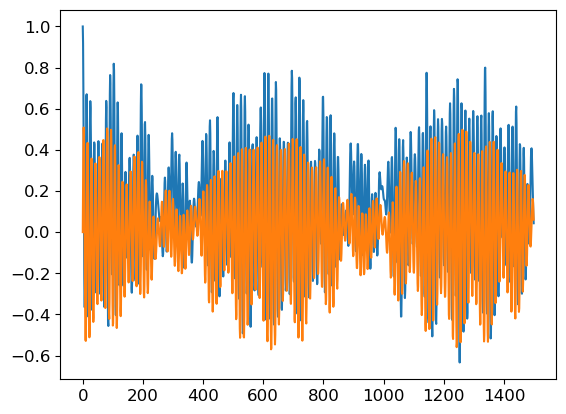

In [17]:
plt.plot(ovlps.real)
plt.plot(ovlps.imag)